In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime

# ==== 路径设置 ====
data_dir = ""
log_path = "log34.txt"
model_dir = "./checkpoints34"
os.makedirs(model_dir, exist_ok=True)

# ==== 日志函数 ====
def write_log(msg):
    with open(log_path, "a") as f:
        f.write(f"[{datetime.now()}] {msg}\n")
    print(msg)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'train'), transform), batch_size=32, shuffle=True)
val_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'val'), transform), batch_size=32, shuffle=False)
test_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'test'), transform), batch_size=32, shuffle=False)
class_names = train_loader.dataset.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== 初始化模型 ====
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ==== 训练模型 ====
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    log = f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Acc: {acc:.4f}"
    write_log(log)

    if (epoch + 1) % 5 == 0:
        save_path = os.path.join(model_dir, f"resnet34_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), save_path)
        write_log(f"Saved model at {save_path}")

# ==== 测试所有模型并记录准确率 ====
import glob

def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# 可视化进度用
accuracies = []

write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))
for path in pth_files:
    model.load_state_dict(torch.load(path))
    acc = evaluate_model(model, test_loader)
    accuracies.append(acc)
    write_log(f"{os.path.basename(path)} - Test Accuracy: {acc:.4f}")

# ==== 绘制准确率曲线 ====
plt.plot(range(5, 5 * len(accuracies) + 1, 5), accuracies, marker='o')
plt.title("Test Accuracy per Saved Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("accuracy_curve.png")
plt.show()


C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[2025-04-20 21:39:16] --- Epoch [1/30] ---


Training Epoch 1: 100%|████████████████████| 275/275 [01:39<00:00,  2.77it/s, acc=0.794, loss=0.379]


[2025-04-20 21:40:55] Epoch [1/30] Complete - Loss: 229.8384, Accuracy: 0.7943
[2025-04-20 21:40:55] --- Epoch [2/30] ---


Training Epoch 2: 100%|████████████████████| 275/275 [01:36<00:00,  2.86it/s, acc=0.965, loss=0.247]


[2025-04-20 21:42:32] Epoch [2/30] Complete - Loss: 40.6831, Accuracy: 0.9647
[2025-04-20 21:42:32] --- Epoch [3/30] ---


Training Epoch 3: 100%|████████████████████| 275/275 [01:27<00:00,  3.13it/s, acc=0.988, loss=0.209]


[2025-04-20 21:43:59] Epoch [3/30] Complete - Loss: 15.5733, Accuracy: 0.9878
[2025-04-20 21:43:59] --- Epoch [4/30] ---


Training Epoch 4: 100%|███████████████████| 275/275 [01:23<00:00,  3.28it/s, acc=0.985, loss=0.0866]


[2025-04-20 21:45:23] Epoch [4/30] Complete - Loss: 15.9715, Accuracy: 0.9846
[2025-04-20 21:45:23] --- Epoch [5/30] ---


Training Epoch 5: 100%|███████████████████| 275/275 [01:24<00:00,  3.26it/s, acc=0.987, loss=0.0369]


[2025-04-20 21:46:48] Epoch [5/30] Complete - Loss: 15.7150, Accuracy: 0.9868
[2025-04-20 21:46:48] Saved model at ./checkpoints34\resnet34_epoch5.pth
[2025-04-20 21:46:48] --- Epoch [6/30] ---


Training Epoch 6: 100%|████████████████████| 275/275 [01:23<00:00,  3.28it/s, acc=0.988, loss=0.175]


[2025-04-20 21:48:12] Epoch [6/30] Complete - Loss: 12.6410, Accuracy: 0.9878
[2025-04-20 21:48:12] --- Epoch [7/30] ---


Training Epoch 7: 100%|████████████████████| 275/275 [01:23<00:00,  3.28it/s, acc=0.99, loss=0.0704]


[2025-04-20 21:49:35] Epoch [7/30] Complete - Loss: 11.3212, Accuracy: 0.9895
[2025-04-20 21:49:35] --- Epoch [8/30] ---


Training Epoch 8: 100%|████████████████████| 275/275 [01:24<00:00,  3.27it/s, acc=0.991, loss=0.019]


[2025-04-20 21:51:00] Epoch [8/30] Complete - Loss: 8.9672, Accuracy: 0.9914
[2025-04-20 21:51:00] --- Epoch [9/30] ---


Training Epoch 9: 100%|███████████████████| 275/275 [01:23<00:00,  3.29it/s, acc=0.989, loss=0.0301]


[2025-04-20 21:52:23] Epoch [9/30] Complete - Loss: 11.2880, Accuracy: 0.9885
[2025-04-20 21:52:23] --- Epoch [10/30] ---


Training Epoch 10: 100%|███████████████████| 275/275 [01:25<00:00,  3.22it/s, acc=0.99, loss=0.0137]


[2025-04-20 21:53:49] Epoch [10/30] Complete - Loss: 9.2363, Accuracy: 0.9901
[2025-04-20 21:53:49] Saved model at ./checkpoints34\resnet34_epoch10.pth
[2025-04-20 21:53:49] --- Epoch [11/30] ---


Training Epoch 11: 100%|██████████████████| 275/275 [01:33<00:00,  2.94it/s, acc=0.989, loss=0.0078]


[2025-04-20 21:55:22] Epoch [11/30] Complete - Loss: 10.0978, Accuracy: 0.9889
[2025-04-20 21:55:22] --- Epoch [12/30] ---


Training Epoch 12: 100%|██████████████████| 275/275 [01:31<00:00,  3.01it/s, acc=0.985, loss=0.0531]


[2025-04-20 21:56:54] Epoch [12/30] Complete - Loss: 15.0661, Accuracy: 0.9851
[2025-04-20 21:56:54] --- Epoch [13/30] ---


Training Epoch 13: 100%|██████████████████| 275/275 [01:33<00:00,  2.93it/s, acc=0.989, loss=0.0196]


[2025-04-20 21:58:28] Epoch [13/30] Complete - Loss: 9.2353, Accuracy: 0.9890
[2025-04-20 21:58:28] --- Epoch [14/30] ---


Training Epoch 14: 100%|██████████████████| 275/275 [01:37<00:00,  2.82it/s, acc=0.989, loss=0.0232]


[2025-04-20 22:00:05] Epoch [14/30] Complete - Loss: 10.3084, Accuracy: 0.9891
[2025-04-20 22:00:05] --- Epoch [15/30] ---


Training Epoch 15: 100%|█████████████████| 275/275 [01:35<00:00,  2.88it/s, acc=0.992, loss=0.00168]


[2025-04-20 22:01:41] Epoch [15/30] Complete - Loss: 6.7742, Accuracy: 0.9925
[2025-04-20 22:01:41] Saved model at ./checkpoints34\resnet34_epoch15.pth
[2025-04-20 22:01:41] --- Epoch [16/30] ---


Training Epoch 16: 100%|██████████████████| 275/275 [01:24<00:00,  3.25it/s, acc=0.997, loss=0.0091]


[2025-04-20 22:03:06] Epoch [16/30] Complete - Loss: 2.8630, Accuracy: 0.9974
[2025-04-20 22:03:06] --- Epoch [17/30] ---


Training Epoch 17: 100%|███████████████████| 275/275 [01:24<00:00,  3.27it/s, acc=0.992, loss=0.232]


[2025-04-20 22:04:30] Epoch [17/30] Complete - Loss: 7.9089, Accuracy: 0.9923
[2025-04-20 22:04:30] --- Epoch [18/30] ---


Training Epoch 18: 100%|████████████████| 275/275 [01:23<00:00,  3.30it/s, acc=0.996, loss=0.000854]


[2025-04-20 22:05:53] Epoch [18/30] Complete - Loss: 5.0083, Accuracy: 0.9956
[2025-04-20 22:05:53] --- Epoch [19/30] ---


Training Epoch 19: 100%|██████████████████| 275/275 [01:23<00:00,  3.28it/s, acc=0.991, loss=0.0144]


[2025-04-20 22:07:17] Epoch [19/30] Complete - Loss: 8.4834, Accuracy: 0.9907
[2025-04-20 22:07:17] --- Epoch [20/30] ---


Training Epoch 20: 100%|██████████████████| 275/275 [01:24<00:00,  3.26it/s, acc=0.99, loss=0.00331]


[2025-04-20 22:08:42] Epoch [20/30] Complete - Loss: 9.1608, Accuracy: 0.9898
[2025-04-20 22:08:42] Saved model at ./checkpoints34\resnet34_epoch20.pth
[2025-04-20 22:08:42] --- Epoch [21/30] ---


Training Epoch 21: 100%|█████████████████| 275/275 [01:24<00:00,  3.25it/s, acc=0.993, loss=0.00122]


[2025-04-20 22:10:06] Epoch [21/30] Complete - Loss: 6.4002, Accuracy: 0.9928
[2025-04-20 22:10:06] --- Epoch [22/30] ---


Training Epoch 22: 100%|███████████████████| 275/275 [01:24<00:00,  3.27it/s, acc=0.994, loss=0.162]


[2025-04-20 22:11:30] Epoch [22/30] Complete - Loss: 6.5344, Accuracy: 0.9939
[2025-04-20 22:11:30] --- Epoch [23/30] ---


Training Epoch 23: 100%|██████████████████| 275/275 [01:22<00:00,  3.34it/s, acc=0.996, loss=0.0119]


[2025-04-20 22:12:53] Epoch [23/30] Complete - Loss: 5.1097, Accuracy: 0.9956
[2025-04-20 22:12:53] --- Epoch [24/30] ---


Training Epoch 24: 100%|██████████████████| 275/275 [01:23<00:00,  3.31it/s, acc=0.995, loss=0.0782]


[2025-04-20 22:14:16] Epoch [24/30] Complete - Loss: 5.3350, Accuracy: 0.9945
[2025-04-20 22:14:16] --- Epoch [25/30] ---


Training Epoch 25: 100%|█████████████████| 275/275 [01:36<00:00,  2.86it/s, acc=0.996, loss=0.00223]


[2025-04-20 22:15:52] Epoch [25/30] Complete - Loss: 3.7732, Accuracy: 0.9961
[2025-04-20 22:15:52] Saved model at ./checkpoints34\resnet34_epoch25.pth
[2025-04-20 22:15:52] --- Epoch [26/30] ---


Training Epoch 26: 100%|█████████████████| 275/275 [01:42<00:00,  2.70it/s, acc=0.993, loss=0.00314]


[2025-04-20 22:17:34] Epoch [26/30] Complete - Loss: 6.2114, Accuracy: 0.9928
[2025-04-20 22:17:34] --- Epoch [27/30] ---


Training Epoch 27: 100%|█████████████████| 275/275 [01:37<00:00,  2.81it/s, acc=0.995, loss=0.00109]


[2025-04-20 22:19:12] Epoch [27/30] Complete - Loss: 5.4000, Accuracy: 0.9948
[2025-04-20 22:19:12] --- Epoch [28/30] ---


Training Epoch 28: 100%|██████████████████| 275/275 [01:22<00:00,  3.33it/s, acc=0.99, loss=0.00521]


[2025-04-20 22:20:34] Epoch [28/30] Complete - Loss: 8.2092, Accuracy: 0.9899
[2025-04-20 22:20:34] --- Epoch [29/30] ---


Training Epoch 29: 100%|█████████████████| 275/275 [01:23<00:00,  3.30it/s, acc=0.995, loss=0.00202]


[2025-04-20 22:21:58] Epoch [29/30] Complete - Loss: 4.9796, Accuracy: 0.9949
[2025-04-20 22:21:58] --- Epoch [30/30] ---


Training Epoch 30: 100%|███████████████████| 275/275 [01:33<00:00,  2.94it/s, acc=0.995, loss=0.002]


[2025-04-20 22:23:32] Epoch [30/30] Complete - Loss: 5.6484, Accuracy: 0.9947
[2025-04-20 22:23:32] Saved model at ./checkpoints34\resnet34_epoch30.pth
[2025-04-20 22:23:32] === Evaluating Saved Models ===
[2025-04-20 22:23:51] resnet34_epoch10.pth - Test Accuracy: 0.9812
[2025-04-20 22:24:07] resnet34_epoch15.pth - Test Accuracy: 0.9812
[2025-04-20 22:24:25] resnet34_epoch20.pth - Test Accuracy: 0.9790
[2025-04-20 22:24:41] resnet34_epoch25.pth - Test Accuracy: 0.9812
[2025-04-20 22:24:54] resnet34_epoch30.pth - Test Accuracy: 0.9750
[2025-04-20 22:25:10] resnet34_epoch5.pth - Test Accuracy: 0.9801


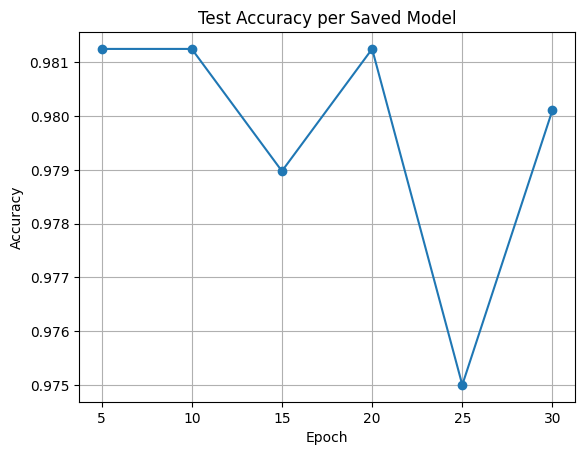

In [1]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from tqdm import tqdm  # 导入进度条

# ==== 路径设置 ====
data_dir = ""  # 请填入你的数据路径（包含train/val/test）
log_path = "log34.txt"
model_dir = "./checkpoints34"
os.makedirs(model_dir, exist_ok=True)

# ==== 清空旧日志 ====
open(log_path, "w").close()

# ==== 日志函数 ====
def write_log(msg):
    timestamp = f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}]"
    full_msg = f"{timestamp} {msg}"
    with open(log_path, "a") as f:
        f.write(full_msg + "\n")
    print(full_msg)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'train'), transform), batch_size=32, shuffle=True)
val_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'val'), transform), batch_size=32, shuffle=False)
test_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'test'), transform), batch_size=32, shuffle=False)
class_names = train_loader.dataset.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== 初始化模型 ====
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ==== 训练模型 ====
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    write_log(f"--- Epoch [{epoch+1}/{num_epochs}] ---")
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # 更新进度条显示信息
        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    acc = correct / total
    write_log(f"Epoch [{epoch+1}/{num_epochs}] Complete - Loss: {running_loss:.4f}, Accuracy: {acc:.4f}")

    # 每5个epoch保存一次模型
    if (epoch + 1) % 5 == 0:
        save_path = os.path.join(model_dir, f"resnet34_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), save_path)
        write_log(f"Saved model at {save_path}")

# ==== 测试所有模型并记录准确率 ====
def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 测试模型 ====
accuracies = []
write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))
for path in pth_files:
    model.load_state_dict(torch.load(path))
    acc = evaluate_model(model, test_loader)
    accuracies.append(acc)
    write_log(f"{os.path.basename(path)} - Test Accuracy: {acc:.4f}")

# ==== 绘制准确率曲线 ====
plt.plot(range(5, 5 * len(accuracies) + 1, 5), accuracies, marker='o')
plt.title("Test Accuracy per Saved Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("accuracy_curve.png")
plt.show()


Parsed 30 epochs of training data
Parsed 6 test accuracy points


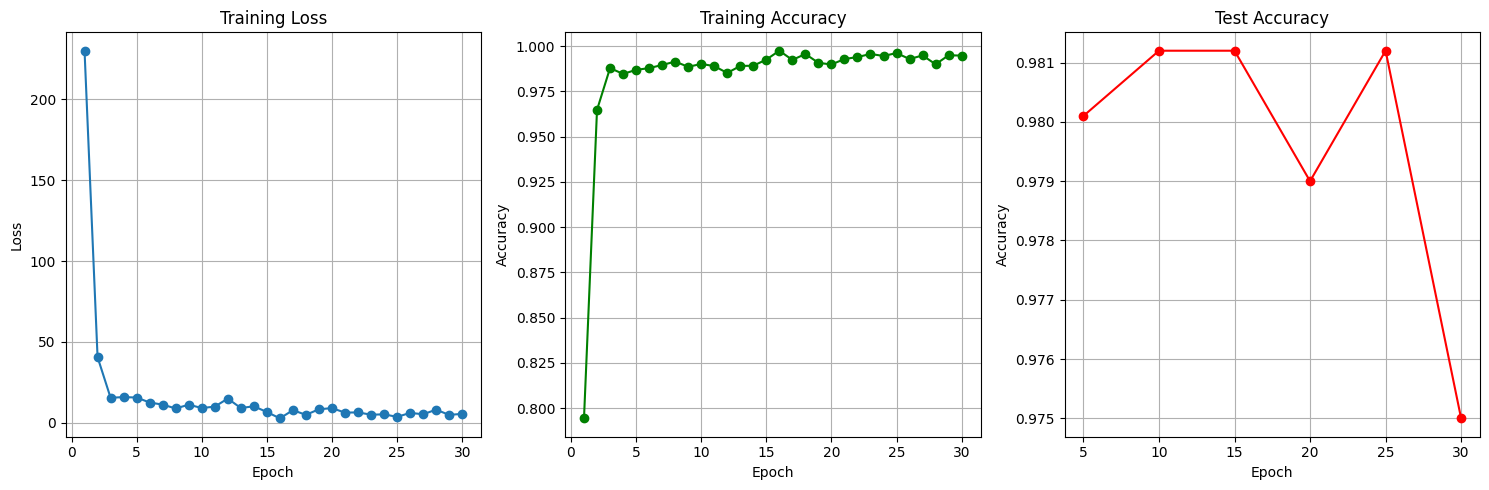

In [3]:
import re
import matplotlib.pyplot as plt

def parse_log_file(log_file):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    test_epochs = []  # 记录测试准确率对应的epoch
    
    # 正则表达式模式
    train_pattern = re.compile(r"Epoch \[(\d+)/\d+\] Complete - Loss: (\d+\.\d+), Accuracy: (\d+\.\d+)")
    test_pattern = re.compile(r"resnet34_epoch(\d+)\.pth - Test Accuracy: (\d+\.\d+)")
    
    with open(log_file, 'r') as f:
        for line in f:
            # 匹配训练数据
            train_match = train_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                loss = float(train_match.group(2))
                acc = float(train_match.group(3))
                
                # 确保按顺序添加
                if epoch == len(train_losses) + 1:
                    train_losses.append(loss)
                    train_accuracies.append(acc)
                else:
                    print(f"Warning: Epoch {epoch} out of sequence")
            
            # 匹配测试数据
            test_match = test_pattern.search(line)
            if test_match:
                epoch = int(test_match.group(1))
                test_acc = float(test_match.group(2))
                test_epochs.append(epoch)
                test_accuracies.append(test_acc)
    
    # 对测试准确率进行排序，确保与epoch顺序一致
    test_data = sorted(zip(test_epochs, test_accuracies))
    sorted_test_epochs, sorted_test_accuracies = zip(*test_data)
    
    return train_losses, train_accuracies, sorted_test_epochs, sorted_test_accuracies

# 解析日志文件
log_file = "resnet34-all-data.txt"  # 请确保文件名正确
train_losses, train_accuracies, test_epochs, test_accuracies = parse_log_file(log_file)

# 确保我们有足够的数据点
num_epochs = len(train_losses)
print(f"Parsed {num_epochs} epochs of training data")
print(f"Parsed {len(test_accuracies)} test accuracy points")

# ==== 绘图 ====
plt.figure(figsize=(15, 5))

# Loss 曲线
plt.subplot(1, 3, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Train Accuracy 曲线
plt.subplot(1, 3, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Test Accuracy 曲线
plt.subplot(1, 3, 3)
plt.plot(test_epochs, test_accuracies, marker='o', color='red')
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("training_test_curves.png")
plt.show()

增强之前，十分之一训练

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[2025-04-29 14:57:23] --- Epoch [1/30] ---


Training Epoch 1: 100%|███████████████████████| 28/28 [00:49<00:00,  1.78s/it, acc=0.362, loss=1.77]


[2025-04-29 14:58:13] Epoch [1/30] Complete - Loss: 2.5605, Accuracy: 0.3618
[2025-04-29 14:58:13] --- Epoch [2/30] ---


Training Epoch 2: 100%|██████████████████████| 28/28 [00:49<00:00,  1.77s/it, acc=0.891, loss=0.684]


[2025-04-29 14:59:03] Epoch [2/30] Complete - Loss: 0.7646, Accuracy: 0.8908
[2025-04-29 14:59:03] --- Epoch [3/30] ---


Training Epoch 3: 100%|██████████████████████| 28/28 [00:53<00:00,  1.91s/it, acc=0.994, loss=0.389]


[2025-04-29 14:59:56] Epoch [3/30] Complete - Loss: 0.2406, Accuracy: 0.9943
[2025-04-29 14:59:56] --- Epoch [4/30] ---


Training Epoch 4: 100%|█████████████████████████| 28/28 [00:55<00:00,  1.97s/it, acc=1, loss=0.0615]


[2025-04-29 15:00:51] Epoch [4/30] Complete - Loss: 0.0875, Accuracy: 1.0000
[2025-04-29 15:00:51] --- Epoch [5/30] ---


Training Epoch 5: 100%|█████████████████████████| 28/28 [00:50<00:00,  1.80s/it, acc=1, loss=0.0477]


[2025-04-29 15:01:42] Epoch [5/30] Complete - Loss: 0.0450, Accuracy: 1.0000
[2025-04-29 15:01:42] Saved model at checkpoint_resnet34-2\resnet34_epoch5.pth
[2025-04-29 15:01:42] --- Epoch [6/30] ---


Training Epoch 6: 100%|█████████████████████████| 28/28 [00:51<00:00,  1.86s/it, acc=1, loss=0.0378]


[2025-04-29 15:02:34] Epoch [6/30] Complete - Loss: 0.0281, Accuracy: 1.0000
[2025-04-29 15:02:34] --- Epoch [7/30] ---


Training Epoch 7: 100%|█████████████████████████| 28/28 [00:54<00:00,  1.96s/it, acc=1, loss=0.0197]


[2025-04-29 15:03:28] Epoch [7/30] Complete - Loss: 0.0211, Accuracy: 1.0000
[2025-04-29 15:03:28] --- Epoch [8/30] ---


Training Epoch 8: 100%|█████████████████████████| 28/28 [00:51<00:00,  1.84s/it, acc=1, loss=0.0286]


[2025-04-29 15:04:20] Epoch [8/30] Complete - Loss: 0.0168, Accuracy: 1.0000
[2025-04-29 15:04:20] --- Epoch [9/30] ---


Training Epoch 9: 100%|█████████████████████████| 28/28 [00:55<00:00,  1.98s/it, acc=1, loss=0.0128]


[2025-04-29 15:05:15] Epoch [9/30] Complete - Loss: 0.0134, Accuracy: 1.0000
[2025-04-29 15:05:15] --- Epoch [10/30] ---


Training Epoch 10: 100%|████████████████████████| 28/28 [00:56<00:00,  2.03s/it, acc=1, loss=0.0315]


[2025-04-29 15:06:12] Epoch [10/30] Complete - Loss: 0.0124, Accuracy: 1.0000
[2025-04-29 15:06:12] Saved model at checkpoint_resnet34-2\resnet34_epoch10.pth
[2025-04-29 15:06:12] --- Epoch [11/30] ---


Training Epoch 11: 100%|████████████████████████| 28/28 [00:56<00:00,  2.02s/it, acc=1, loss=0.0124]


[2025-04-29 15:07:09] Epoch [11/30] Complete - Loss: 0.0106, Accuracy: 1.0000
[2025-04-29 15:07:09] --- Epoch [12/30] ---


Training Epoch 12: 100%|████████████████████████| 28/28 [00:57<00:00,  2.07s/it, acc=1, loss=0.0262]


[2025-04-29 15:08:07] Epoch [12/30] Complete - Loss: 0.0092, Accuracy: 1.0000
[2025-04-29 15:08:07] --- Epoch [13/30] ---


Training Epoch 13: 100%|███████████████████████| 28/28 [00:55<00:00,  1.97s/it, acc=1, loss=0.00939]


[2025-04-29 15:09:02] Epoch [13/30] Complete - Loss: 0.0091, Accuracy: 1.0000
[2025-04-29 15:09:02] --- Epoch [14/30] ---


Training Epoch 14: 100%|███████████████████████| 28/28 [00:58<00:00,  2.07s/it, acc=1, loss=0.00582]


[2025-04-29 15:10:00] Epoch [14/30] Complete - Loss: 0.0067, Accuracy: 1.0000
[2025-04-29 15:10:00] --- Epoch [15/30] ---


Training Epoch 15: 100%|███████████████████████| 28/28 [00:57<00:00,  2.06s/it, acc=1, loss=0.00485]


[2025-04-29 15:10:57] Epoch [15/30] Complete - Loss: 0.0060, Accuracy: 1.0000
[2025-04-29 15:10:58] Saved model at checkpoint_resnet34-2\resnet34_epoch15.pth
[2025-04-29 15:10:58] --- Epoch [16/30] ---


Training Epoch 16: 100%|███████████████████████| 28/28 [00:57<00:00,  2.07s/it, acc=1, loss=0.00907]


[2025-04-29 15:11:56] Epoch [16/30] Complete - Loss: 0.0054, Accuracy: 1.0000
[2025-04-29 15:11:56] --- Epoch [17/30] ---


Training Epoch 17: 100%|████████████████████████| 28/28 [00:57<00:00,  2.05s/it, acc=1, loss=0.0133]


[2025-04-29 15:12:53] Epoch [17/30] Complete - Loss: 0.0049, Accuracy: 1.0000
[2025-04-29 15:12:53] --- Epoch [18/30] ---


Training Epoch 18: 100%|███████████████████████| 28/28 [00:56<00:00,  2.01s/it, acc=1, loss=0.00741]


[2025-04-29 15:13:49] Epoch [18/30] Complete - Loss: 0.0044, Accuracy: 1.0000
[2025-04-29 15:13:49] --- Epoch [19/30] ---


Training Epoch 19: 100%|███████████████████████| 28/28 [00:51<00:00,  1.85s/it, acc=1, loss=0.00569]


[2025-04-29 15:14:41] Epoch [19/30] Complete - Loss: 0.0040, Accuracy: 1.0000
[2025-04-29 15:14:41] --- Epoch [20/30] ---


Training Epoch 20: 100%|████████████████████████| 28/28 [00:59<00:00,  2.14s/it, acc=1, loss=0.0108]


[2025-04-29 15:15:41] Epoch [20/30] Complete - Loss: 0.0045, Accuracy: 1.0000
[2025-04-29 15:15:41] Saved model at checkpoint_resnet34-2\resnet34_epoch20.pth
[2025-04-29 15:15:41] --- Epoch [21/30] ---


Training Epoch 21: 100%|███████████████████████| 28/28 [01:00<00:00,  2.16s/it, acc=1, loss=0.00832]


[2025-04-29 15:16:42] Epoch [21/30] Complete - Loss: 0.0040, Accuracy: 1.0000
[2025-04-29 15:16:42] --- Epoch [22/30] ---


Training Epoch 22: 100%|███████████████████████| 28/28 [00:58<00:00,  2.09s/it, acc=1, loss=0.00795]


[2025-04-29 15:17:40] Epoch [22/30] Complete - Loss: 0.0038, Accuracy: 1.0000
[2025-04-29 15:17:40] --- Epoch [23/30] ---


Training Epoch 23: 100%|███████████████████████| 28/28 [01:02<00:00,  2.22s/it, acc=1, loss=0.00823]


[2025-04-29 15:18:42] Epoch [23/30] Complete - Loss: 0.0033, Accuracy: 1.0000
[2025-04-29 15:18:42] --- Epoch [24/30] ---


Training Epoch 24: 100%|███████████████████████| 28/28 [01:01<00:00,  2.21s/it, acc=1, loss=0.00397]


[2025-04-29 15:19:44] Epoch [24/30] Complete - Loss: 0.0029, Accuracy: 1.0000
[2025-04-29 15:19:44] --- Epoch [25/30] ---


Training Epoch 25: 100%|████████████████████████| 28/28 [01:01<00:00,  2.20s/it, acc=1, loss=0.0197]


[2025-04-29 15:20:46] Epoch [25/30] Complete - Loss: 0.0031, Accuracy: 1.0000
[2025-04-29 15:20:46] Saved model at checkpoint_resnet34-2\resnet34_epoch25.pth
[2025-04-29 15:20:46] --- Epoch [26/30] ---


Training Epoch 26: 100%|████████████████████████| 28/28 [01:02<00:00,  2.25s/it, acc=1, loss=0.0119]


[2025-04-29 15:21:49] Epoch [26/30] Complete - Loss: 0.0028, Accuracy: 1.0000
[2025-04-29 15:21:49] --- Epoch [27/30] ---


Training Epoch 27: 100%|███████████████████████| 28/28 [00:58<00:00,  2.07s/it, acc=1, loss=0.00359]


[2025-04-29 15:22:47] Epoch [27/30] Complete - Loss: 0.0026, Accuracy: 1.0000
[2025-04-29 15:22:47] --- Epoch [28/30] ---


Training Epoch 28: 100%|████████████████████████| 28/28 [00:59<00:00,  2.11s/it, acc=1, loss=0.0126]


[2025-04-29 15:23:46] Epoch [28/30] Complete - Loss: 0.0027, Accuracy: 1.0000
[2025-04-29 15:23:46] --- Epoch [29/30] ---


Training Epoch 29: 100%|███████████████████████| 28/28 [00:55<00:00,  1.97s/it, acc=1, loss=0.00561]


[2025-04-29 15:24:41] Epoch [29/30] Complete - Loss: 0.0024, Accuracy: 1.0000
[2025-04-29 15:24:41] --- Epoch [30/30] ---


Training Epoch 30: 100%|███████████████████████| 28/28 [00:50<00:00,  1.80s/it, acc=1, loss=0.00387]


[2025-04-29 15:25:31] Epoch [30/30] Complete - Loss: 0.0022, Accuracy: 1.0000
[2025-04-29 15:25:31] Saved model at checkpoint_resnet34-2\resnet34_epoch30.pth
[2025-04-29 15:25:31] === Evaluating Saved Models ===
[2025-04-29 15:26:14] resnet34_epoch10.pth - Test Accuracy: 0.8205
[2025-04-29 15:26:56] resnet34_epoch15.pth - Test Accuracy: 0.8278
[2025-04-29 15:27:38] resnet34_epoch20.pth - Test Accuracy: 0.8284
[2025-04-29 15:28:19] resnet34_epoch25.pth - Test Accuracy: 0.8227
[2025-04-29 15:29:01] resnet34_epoch30.pth - Test Accuracy: 0.8261
[2025-04-29 15:29:44] resnet34_epoch5.pth - Test Accuracy: 0.8244


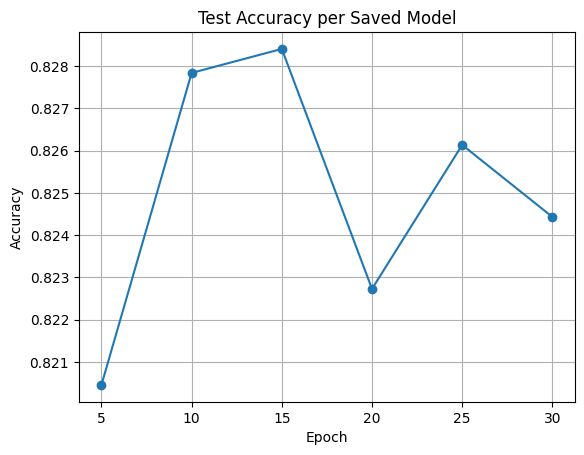

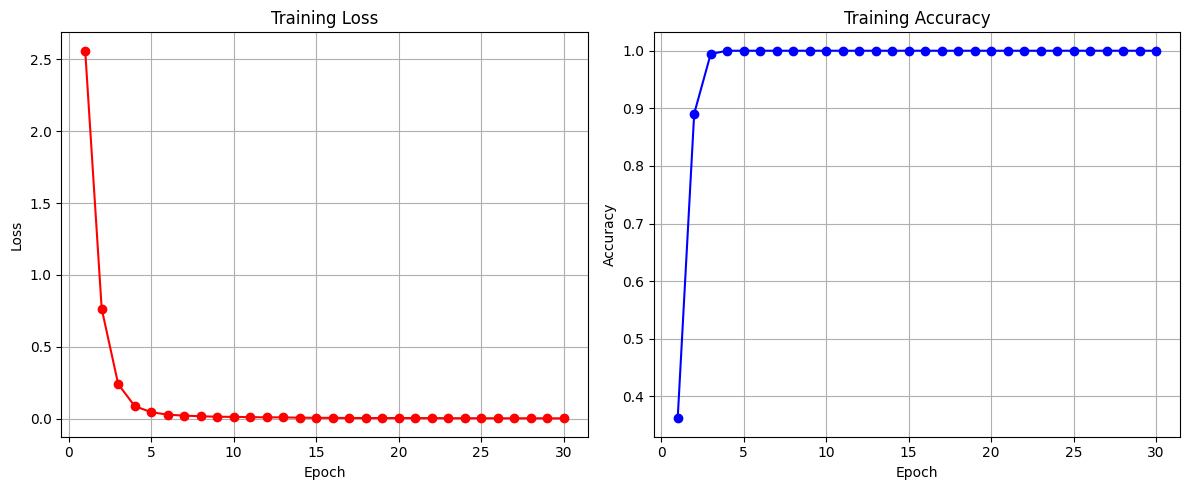

In [1]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from tqdm import tqdm

# ==== 路径设置 ====
data_dir = ""  # 请填入你的数据路径（包含train/val/test）
model_dir = "checkpoint_resnet34-2"
os.makedirs(model_dir, exist_ok=True)

# ==== 清空旧日志 ====
open(log_path, "w").close()

# ==== 日志函数 ====
def write_log(msg):
    timestamp = f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}]"
    full_msg = f"{timestamp} {msg}"
    with open(log_path, "a") as f:
        f.write(full_msg + "\n")
    print(full_msg)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# ==== 加载并划分训练数据（使用四分之一） ====
full_train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform)
targets = full_train_dataset.targets  # 所有图像的标签列表

# Stratified 方式选择四分之一数据
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.9, random_state=42)
for train_idx, _ in sss.split(torch.zeros(len(targets)), targets):
    reduced_train_dataset = Subset(full_train_dataset, train_idx)

train_loader = DataLoader(reduced_train_dataset, batch_size=32, shuffle=True)

# ==== 加载验证集和测试集（完整） ====
val_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'val'), transform), batch_size=32, shuffle=False)
test_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'test'), transform), batch_size=32, shuffle=False)

class_names = full_train_dataset.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== 初始化模型 ====
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ==== 训练模型 ====
num_epochs = 30

# 记录每个epoch的训练loss和准确率
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    write_log(f"--- Epoch [{epoch+1}/{num_epochs}] ---")
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    write_log(f"Epoch [{epoch+1}/{num_epochs}] Complete - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    if (epoch + 1) % 5 == 0:
        save_path = os.path.join(model_dir, f"resnet34_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), save_path)
        write_log(f"Saved model at {save_path}")

# ==== 测试函数 ====
def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 测试模型 ====
accuracies = []
write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))
for path in pth_files:
    model.load_state_dict(torch.load(path))
    acc = evaluate_model(model, test_loader)
    accuracies.append(acc)
    write_log(f"{os.path.basename(path)} - Test Accuracy: {acc:.4f}")

# ==== 绘制测试集准确率变化 ====
plt.figure()
plt.plot(range(5, 5 * len(accuracies) + 1, 5), accuracies, marker='o')
plt.title("Test Accuracy per Saved Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("accuracy_curve.png")
plt.show()

# ==== 绘制训练loss和准确率曲线 ====
plt.figure(figsize=(12,5))

# Loss曲线
plt.subplot(1,2,1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', color='red')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Accuracy曲线
plt.subplot(1,2,2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='blue')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("training_curves.png")
plt.show()


增强之后训练模型

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[2025-04-30 10:59:32] --- Epoch [1/30] ---


Training Epoch 1: 100%|████████████████████| 138/138 [00:38<00:00,  3.56it/s, acc=0.727, loss=0.461]


[2025-04-30 11:00:11] Epoch [1/30] Complete - Loss: 1.1802, Accuracy: 0.7265
[2025-04-30 11:00:11] --- Epoch [2/30] ---


Training Epoch 2: 100%|████████████████████| 138/138 [00:40<00:00,  3.42it/s, acc=0.989, loss=0.332]


[2025-04-30 11:00:51] Epoch [2/30] Complete - Loss: 0.1051, Accuracy: 0.9886
[2025-04-30 11:00:51] --- Epoch [3/30] ---


Training Epoch 3: 100%|███████████████████| 138/138 [00:54<00:00,  2.53it/s, acc=0.997, loss=0.0836]


[2025-04-30 11:01:46] Epoch [3/30] Complete - Loss: 0.0370, Accuracy: 0.9973
[2025-04-30 11:01:46] --- Epoch [4/30] ---


Training Epoch 4: 100%|███████████████████| 138/138 [00:58<00:00,  2.36it/s, acc=0.999, loss=0.0266]


[2025-04-30 11:02:44] Epoch [4/30] Complete - Loss: 0.0159, Accuracy: 0.9993
[2025-04-30 11:02:44] --- Epoch [5/30] ---


Training Epoch 5: 100%|████████████████████| 138/138 [00:59<00:00,  2.31it/s, acc=0.998, loss=0.012]


[2025-04-30 11:03:44] Epoch [5/30] Complete - Loss: 0.0149, Accuracy: 0.9984
[2025-04-30 11:03:44] Saved model at ./check_improve_34\resnet34_epoch5.pth
[2025-04-30 11:03:44] --- Epoch [6/30] ---


Training Epoch 6: 100%|███████████████████| 138/138 [01:01<00:00,  2.24it/s, acc=0.999, loss=0.0489]


[2025-04-30 11:04:46] Epoch [6/30] Complete - Loss: 0.0109, Accuracy: 0.9991
[2025-04-30 11:04:46] --- Epoch [7/30] ---


Training Epoch 7: 100%|████████████████████| 138/138 [00:57<00:00,  2.40it/s, acc=0.997, loss=0.118]


[2025-04-30 11:05:43] Epoch [7/30] Complete - Loss: 0.0169, Accuracy: 0.9968
[2025-04-30 11:05:43] --- Epoch [8/30] ---


Training Epoch 8: 100%|█████████████████████| 138/138 [00:48<00:00,  2.83it/s, acc=0.967, loss=0.13]


[2025-04-30 11:06:32] Epoch [8/30] Complete - Loss: 0.1244, Accuracy: 0.9670
[2025-04-30 11:06:32] --- Epoch [9/30] ---


Training Epoch 9: 100%|████████████████████| 138/138 [00:50<00:00,  2.75it/s, acc=0.975, loss=0.336]


[2025-04-30 11:07:22] Epoch [9/30] Complete - Loss: 0.0938, Accuracy: 0.9747
[2025-04-30 11:07:22] --- Epoch [10/30] ---


Training Epoch 10: 100%|███████████████████| 138/138 [00:45<00:00,  3.04it/s, acc=0.996, loss=0.012]


[2025-04-30 11:08:08] Epoch [10/30] Complete - Loss: 0.0284, Accuracy: 0.9961
[2025-04-30 11:08:08] Saved model at ./check_improve_34\resnet34_epoch10.pth
[2025-04-30 11:08:08] --- Epoch [11/30] ---


Training Epoch 11: 100%|██████████████████| 138/138 [00:49<00:00,  2.77it/s, acc=0.995, loss=0.0152]


[2025-04-30 11:08:58] Epoch [11/30] Complete - Loss: 0.0216, Accuracy: 0.9948
[2025-04-30 11:08:58] --- Epoch [12/30] ---


Training Epoch 12: 100%|██████████████████| 138/138 [00:56<00:00,  2.46it/s, acc=0.998, loss=0.0678]


[2025-04-30 11:09:54] Epoch [12/30] Complete - Loss: 0.0152, Accuracy: 0.9977
[2025-04-30 11:09:54] --- Epoch [13/30] ---


Training Epoch 13: 100%|██████████████████| 138/138 [00:50<00:00,  2.75it/s, acc=0.999, loss=0.0117]


[2025-04-30 11:10:44] Epoch [13/30] Complete - Loss: 0.0069, Accuracy: 0.9993
[2025-04-30 11:10:44] --- Epoch [14/30] ---


Training Epoch 14: 100%|██████████████████████| 138/138 [00:48<00:00,  2.84it/s, acc=1, loss=0.0109]


[2025-04-30 11:11:33] Epoch [14/30] Complete - Loss: 0.0039, Accuracy: 0.9995
[2025-04-30 11:11:33] --- Epoch [15/30] ---


Training Epoch 15: 100%|█████████████████| 138/138 [00:47<00:00,  2.90it/s, acc=0.993, loss=0.00632]


[2025-04-30 11:12:20] Epoch [15/30] Complete - Loss: 0.0289, Accuracy: 0.9934
[2025-04-30 11:12:20] Saved model at ./check_improve_34\resnet34_epoch15.pth
[2025-04-30 11:12:20] --- Epoch [16/30] ---


Training Epoch 16: 100%|██████████████████| 138/138 [00:49<00:00,  2.81it/s, acc=0.995, loss=0.0306]


[2025-04-30 11:13:09] Epoch [16/30] Complete - Loss: 0.0196, Accuracy: 0.9950
[2025-04-30 11:13:09] --- Epoch [17/30] ---


Training Epoch 17: 100%|███████████████████| 138/138 [00:47<00:00,  2.90it/s, acc=0.997, loss=0.131]


[2025-04-30 11:13:57] Epoch [17/30] Complete - Loss: 0.0156, Accuracy: 0.9968
[2025-04-30 11:13:57] --- Epoch [18/30] ---


Training Epoch 18: 100%|██████████████████| 138/138 [00:53<00:00,  2.60it/s, acc=0.991, loss=0.0205]


[2025-04-30 11:14:50] Epoch [18/30] Complete - Loss: 0.0393, Accuracy: 0.9907
[2025-04-30 11:14:50] --- Epoch [19/30] ---


Training Epoch 19: 100%|██████████████████| 138/138 [00:49<00:00,  2.82it/s, acc=0.985, loss=0.0515]


[2025-04-30 11:15:39] Epoch [19/30] Complete - Loss: 0.0569, Accuracy: 0.9852
[2025-04-30 11:15:39] --- Epoch [20/30] ---


Training Epoch 20: 100%|█████████████████| 138/138 [00:43<00:00,  3.16it/s, acc=0.991, loss=0.00385]


[2025-04-30 11:16:23] Epoch [20/30] Complete - Loss: 0.0376, Accuracy: 0.9907
[2025-04-30 11:16:23] Saved model at ./check_improve_34\resnet34_epoch20.pth
[2025-04-30 11:16:23] --- Epoch [21/30] ---


Training Epoch 21: 100%|██████████████████| 138/138 [00:45<00:00,  3.06it/s, acc=0.996, loss=0.0651]


[2025-04-30 11:17:08] Epoch [21/30] Complete - Loss: 0.0166, Accuracy: 0.9964
[2025-04-30 11:17:08] --- Epoch [22/30] ---


Training Epoch 22: 100%|███████████████████| 138/138 [00:49<00:00,  2.80it/s, acc=0.995, loss=0.218]


[2025-04-30 11:17:57] Epoch [22/30] Complete - Loss: 0.0202, Accuracy: 0.9945
[2025-04-30 11:17:57] --- Epoch [23/30] ---


Training Epoch 23: 100%|███████████████████| 138/138 [00:48<00:00,  2.82it/s, acc=0.993, loss=0.064]


[2025-04-30 11:18:46] Epoch [23/30] Complete - Loss: 0.0236, Accuracy: 0.9932
[2025-04-30 11:18:46] --- Epoch [24/30] ---


Training Epoch 24: 100%|██████████████████| 138/138 [00:51<00:00,  2.68it/s, acc=0.996, loss=0.0107]


[2025-04-30 11:19:38] Epoch [24/30] Complete - Loss: 0.0144, Accuracy: 0.9964
[2025-04-30 11:19:38] --- Epoch [25/30] ---


Training Epoch 25: 100%|██████████████████| 138/138 [00:52<00:00,  2.62it/s, acc=0.999, loss=0.0105]


[2025-04-30 11:20:30] Epoch [25/30] Complete - Loss: 0.0055, Accuracy: 0.9993
[2025-04-30 11:20:30] Saved model at ./check_improve_34\resnet34_epoch25.pth
[2025-04-30 11:20:30] --- Epoch [26/30] ---


Training Epoch 26: 100%|█████████████████████| 138/138 [00:48<00:00,  2.87it/s, acc=1, loss=0.00253]


[2025-04-30 11:21:19] Epoch [26/30] Complete - Loss: 0.0026, Accuracy: 0.9995
[2025-04-30 11:21:19] --- Epoch [27/30] ---


Training Epoch 27: 100%|█████████████████████| 138/138 [00:35<00:00,  3.84it/s, acc=1, loss=0.00308]


[2025-04-30 11:21:54] Epoch [27/30] Complete - Loss: 0.0020, Accuracy: 1.0000
[2025-04-30 11:21:54] --- Epoch [28/30] ---


Training Epoch 28: 100%|█████████████████| 138/138 [00:35<00:00,  3.85it/s, acc=0.999, loss=0.00635]


[2025-04-30 11:22:30] Epoch [28/30] Complete - Loss: 0.0030, Accuracy: 0.9991
[2025-04-30 11:22:30] --- Epoch [29/30] ---


Training Epoch 29: 100%|█████████████████| 138/138 [00:35<00:00,  3.88it/s, acc=0.997, loss=0.00853]


[2025-04-30 11:23:06] Epoch [29/30] Complete - Loss: 0.0101, Accuracy: 0.9966
[2025-04-30 11:23:06] --- Epoch [30/30] ---


Training Epoch 30: 100%|████████████████████| 138/138 [00:36<00:00,  3.80it/s, acc=0.985, loss=0.23]


[2025-04-30 11:23:42] Epoch [30/30] Complete - Loss: 0.0519, Accuracy: 0.9848
[2025-04-30 11:23:42] Saved model at ./check_improve_34\resnet34_epoch30.pth
[2025-04-30 11:23:42] === Evaluating Saved Models ===
[2025-04-30 11:23:57] resnet34_epoch10.pth - Test Accuracy: 0.8142
[2025-04-30 11:24:11] resnet34_epoch15.pth - Test Accuracy: 0.8006
[2025-04-30 11:24:24] resnet34_epoch20.pth - Test Accuracy: 0.7875
[2025-04-30 11:24:37] resnet34_epoch25.pth - Test Accuracy: 0.8267
[2025-04-30 11:24:50] resnet34_epoch30.pth - Test Accuracy: 0.7585
[2025-04-30 11:25:03] resnet34_epoch5.pth - Test Accuracy: 0.8267


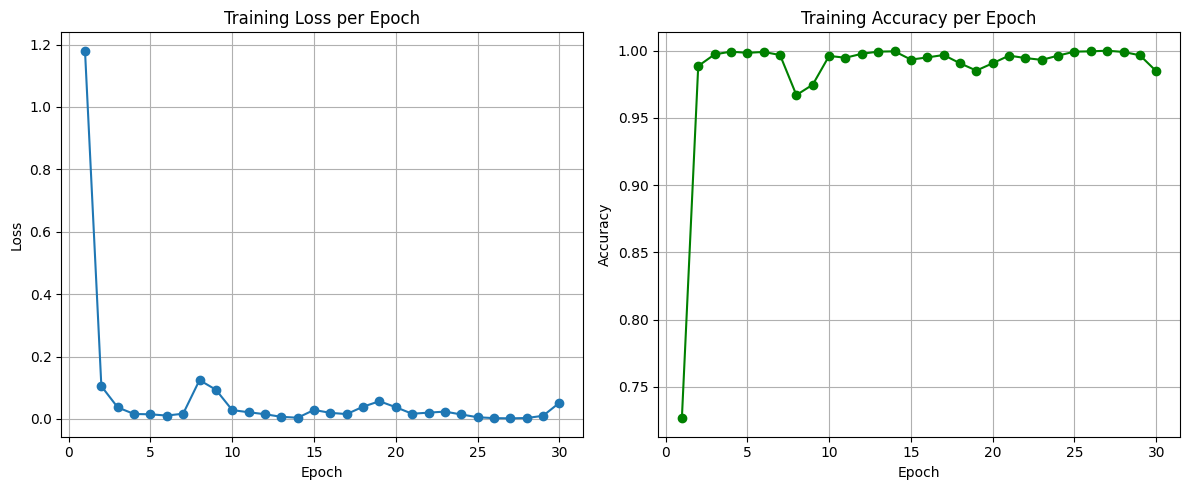

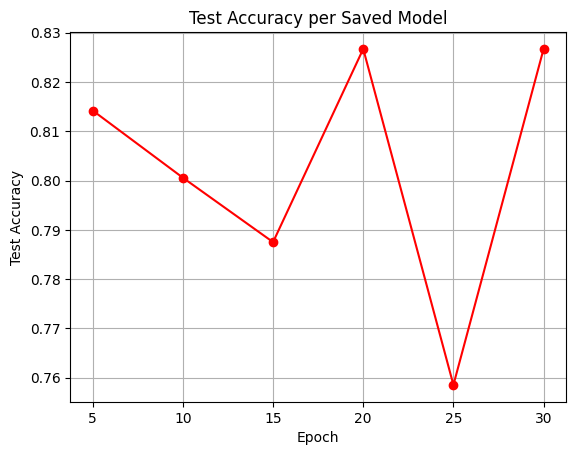

In [1]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from tqdm import tqdm  # 导入进度条

# ==== 路径设置 ====
data_dir = ""  # 请填入你的数据路径（包含train/val/test）
model_dir = "./check_improve_34"
log_path = "log_improve34.txt"  # 这里之前忘了定义log_path，顺便补上
os.makedirs(model_dir, exist_ok=True)

# ==== 清空旧日志 ====
open(log_path, "w").close()

# ==== 日志函数 ====
def write_log(msg):
    timestamp = f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}]"
    full_msg = f"{timestamp} {msg}"
    with open(log_path, "a") as f:
        f.write(full_msg + "\n")
    print(full_msg)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'train_improve-2'), transform), batch_size=32, shuffle=True)
val_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'val'), transform), batch_size=32, shuffle=False)
test_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'test'), transform), batch_size=32, shuffle=False)

class_names = train_loader.dataset.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== 初始化模型 ====
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ==== 初始化记录曲线的数据 ====
train_losses = []
train_accuracies = []

# ==== 训练模型 ====
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    write_log(f"--- Epoch [{epoch+1}/{num_epochs}] ---")
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # 更新进度条显示信息
        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    write_log(f"Epoch [{epoch+1}/{num_epochs}] Complete - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # 每5个epoch保存一次模型
    if (epoch + 1) % 5 == 0:
        save_path = os.path.join(model_dir, f"resnet34_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), save_path)
        write_log(f"Saved model at {save_path}")

# ==== 测试所有模型并记录准确率 ====
def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 测试模型 ====
test_accuracies = []
write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))
for path in pth_files:
    model.load_state_dict(torch.load(path))
    acc = evaluate_model(model, test_loader)
    test_accuracies.append(acc)
    write_log(f"{os.path.basename(path)} - Test Accuracy: {acc:.4f}")

# ==== 绘制训练曲线 ====
plt.figure(figsize=(12, 5))

# 绘制Loss曲线
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# 绘制Accuracy曲线
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("train_loss_accuracy_curve.png")
plt.show()

# ==== 绘制保存模型的测试集准确率曲线 ====
plt.figure()
plt.plot(range(5, 5 * len(test_accuracies) + 1, 5), test_accuracies, marker='o', color='red')
plt.title("Test Accuracy per Saved Model")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.savefig("test_accuracy_curve.png")
plt.show()


NameError: name 'plt' is not defined

增强之后十分之一训练（无高斯噪声）

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[2025-05-03 20:30:34] --- Epoch [1/5] ---


Training Epoch 1: 100%|████████████████████| 152/152 [00:57<00:00,  2.67it/s, acc=0.674, loss=0.373]


[2025-05-03 20:31:31] Epoch [1/5] Complete - Loss: 1.3416, Accuracy: 0.6744
[2025-05-03 20:31:31] --- Epoch [2/5] ---


Training Epoch 2: 100%|████████████████████| 152/152 [00:56<00:00,  2.71it/s, acc=0.973, loss=0.197]


[2025-05-03 20:32:27] Epoch [2/5] Complete - Loss: 0.1727, Accuracy: 0.9726
[2025-05-03 20:32:27] --- Epoch [3/5] ---


Training Epoch 3: 100%|███████████████████| 152/152 [00:42<00:00,  3.54it/s, acc=0.996, loss=0.0215]


[2025-05-03 20:33:09] Epoch [3/5] Complete - Loss: 0.0404, Accuracy: 0.9965
[2025-05-03 20:33:09] --- Epoch [4/5] ---


Training Epoch 4: 100%|███████████████████| 152/152 [00:53<00:00,  2.84it/s, acc=0.999, loss=0.0187]


[2025-05-03 20:34:03] Epoch [4/5] Complete - Loss: 0.0173, Accuracy: 0.9986
[2025-05-03 20:34:03] --- Epoch [5/5] ---


Training Epoch 5: 100%|███████████████████████| 152/152 [00:37<00:00,  4.07it/s, acc=1, loss=0.0172]


[2025-05-03 20:34:40] Epoch [5/5] Complete - Loss: 0.0084, Accuracy: 1.0000
[2025-05-03 20:34:40] Saved model at ./check_improve_strong_34\resnet34_epoch5.pth
[2025-05-03 20:34:56] Test Accuracy at Epoch 5: 0.8295


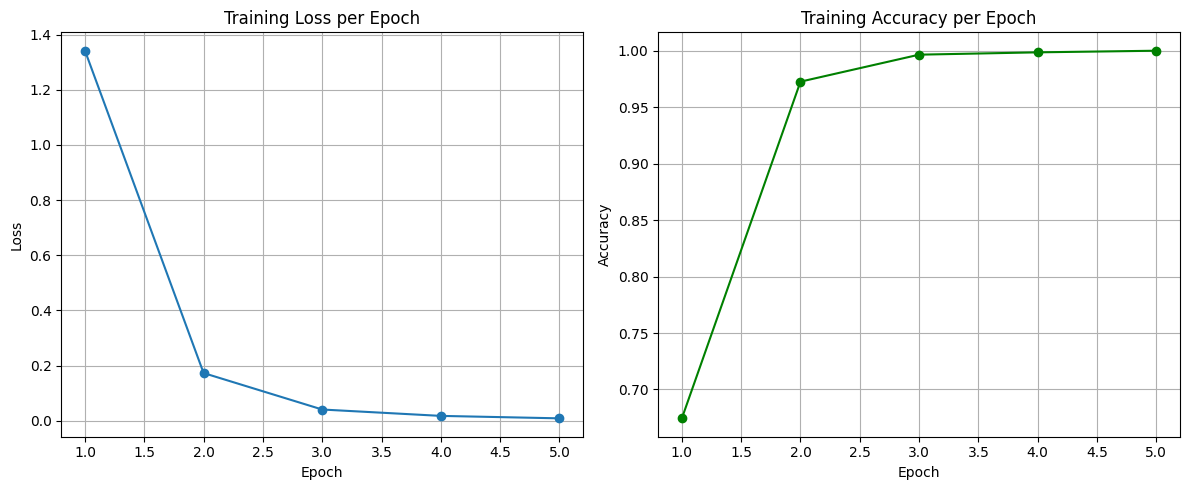

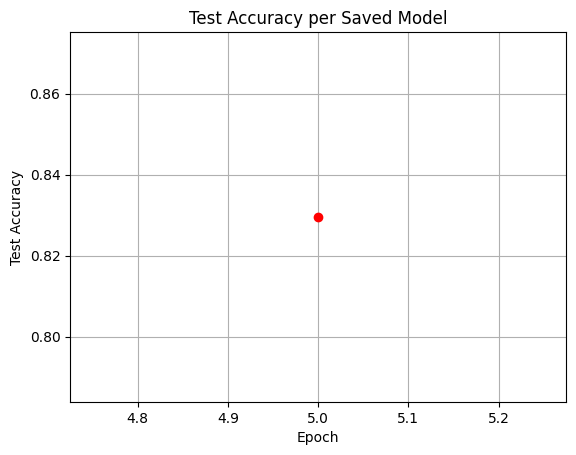

In [1]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from tqdm import tqdm

# ==== 设置路径 ====
data_dir = ""  # 请设置为你的数据路径（包含 train/val/test）
model_dir = "./check_improve_strong_34"
os.makedirs(model_dir, exist_ok=True)
log_path = os.path.join(model_dir, "train_log.txt")

# ==== 清空旧日志 ====
open(log_path, "w").close()

# ==== 日志函数 ====
def write_log(msg):
    timestamp = f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}]"
    full_msg = f"{timestamp} {msg}"
    with open(log_path, "a") as f:
        f.write(full_msg + "\n")
    print(full_msg)

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'train_aug_strong'), transform), batch_size=32, shuffle=True)
val_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'val'), transform), batch_size=32, shuffle=False)
test_loader = DataLoader(datasets.ImageFolder(os.path.join(data_dir, 'test'), transform), batch_size=32, shuffle=False)

class_names = train_loader.dataset.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== 初始化模型 ====
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ==== 记录训练信息 ====
train_losses = []
train_accuracies = []
test_accuracies = []

# ==== 测试函数 ====
def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 训练模型 ====
num_epochs = 5  # 可根据需要修改
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    write_log(f"--- Epoch [{epoch+1}/{num_epochs}] ---")
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    write_log(f"Epoch [{epoch+1}/{num_epochs}] Complete - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # 每两轮保存一次模型并在test集评估
    if (epoch + 1) % 5 == 0:
        save_path = os.path.join(model_dir, f"resnet34_epoch{epoch+1}.pth")
        torch.save(model.state_dict(), save_path)
        write_log(f"Saved model at {save_path}")

        test_acc = evaluate_model(model, test_loader)
        test_accuracies.append((epoch + 1, test_acc))
        write_log(f"Test Accuracy at Epoch {epoch+1}: {test_acc:.4f}")

# ==== 绘制训练曲线 ====
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("train_loss_accuracy_curve.png")
plt.show()

# ==== 绘制Test准确率曲线 ====
if test_accuracies:
    epochs, test_accs = zip(*test_accuracies)
    plt.figure()
    plt.plot(epochs, test_accs, marker='o', color='red')
    plt.title("Test Accuracy per Saved Model")
    plt.xlabel("Epoch")
    plt.ylabel("Test Accuracy")
    plt.grid(True)
    plt.savefig("test_accuracy_curve.png")
    plt.show()
